In [1]:
# Regression Germination
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("pln21.csv")
df.head()

,temp,time,medium,gr,ptl
0,5,2,1,0.0,0.0
1,10,2,1,0.0,0.0
2,15,2,1,0.0,0.0
3,20,2,1,0.0,0.0
4,25,2,1,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    336 non-null    int64  
 1   time    336 non-null    int64  
 2   medium  336 non-null    int64  
 3   gr      336 non-null    float64
 4   ptl     336 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 13.2 KB


In [4]:
X=df.iloc[:,1:4].values
y=df.iloc[:,4].values

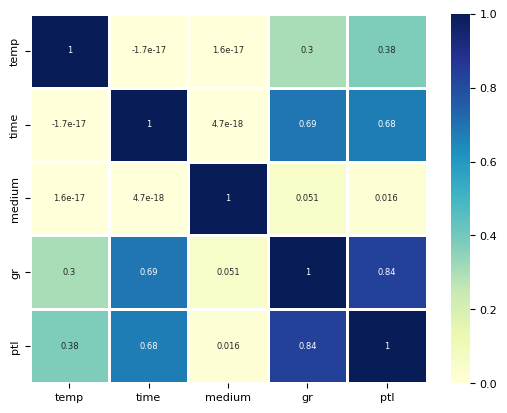

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 8}

plt.rc('font', **font)

sns.heatmap(data=df.corr(), cmap="YlGnBu", annot=True , annot_kws={'size': 6},linewidths=1, linecolor='white')
plt.savefig("matris.png")
# Pivot table&chart

# table=pd.pivot_table(data=df,index=['temp','time'])


In [6]:
sns.set_style("white")

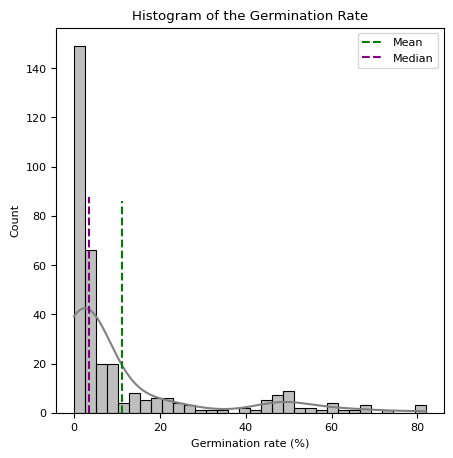

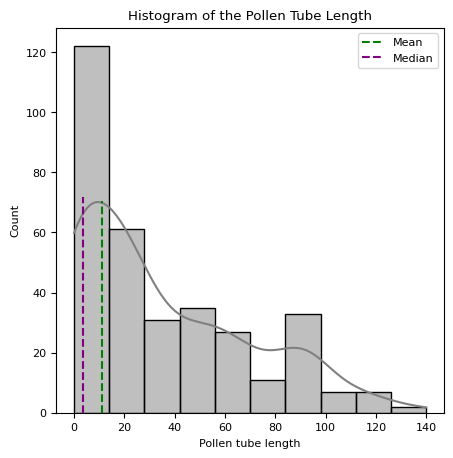

In [7]:
plt.figure(figsize=(5,5))
plt.style.use("default")

font = {'family' : 'Cambria',
        'weight' : 'regular',
        'size'   : 8}

plt.rc('font', **font)

sns.histplot(data=df,x="gr",color="grey",kde=True)
plt.axvline(x=df["gr"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["gr"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Germination Rate")
plt.xlabel("Germination rate (%)")
plt.savefig('gr_histogram.png')


plt.figure(figsize=(5,5))
sns.histplot(data=df,x="ptl",color="grey",kde=True)
plt.axvline(x=df["gr"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["gr"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Pollen Tube Length")
plt.xlabel("Pollen tube length")
plt.savefig('ptl_histogram.png')



**zero data problem !!!**

Text(0.5, 1.0, 'Cumulative of the Germination Rate')

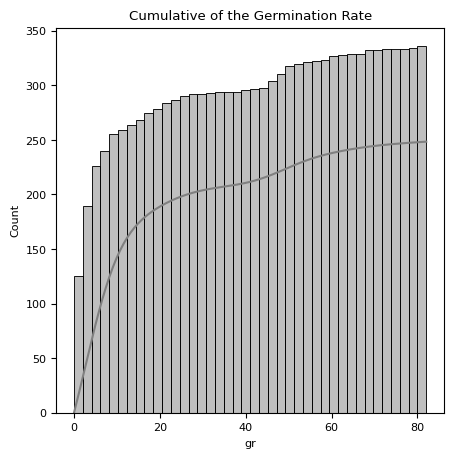

In [8]:
plt.figure(figsize = (5,5))
font = {'family' : 'Cambria',
        'weight' : 'regular',
        'size'   : 8}

plt.rc('font', **font)
sns.histplot(df["gr"],kde=True,bins=40,color="grey",cumulative=True)
plt.title("Cumulative of the Germination Rate")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


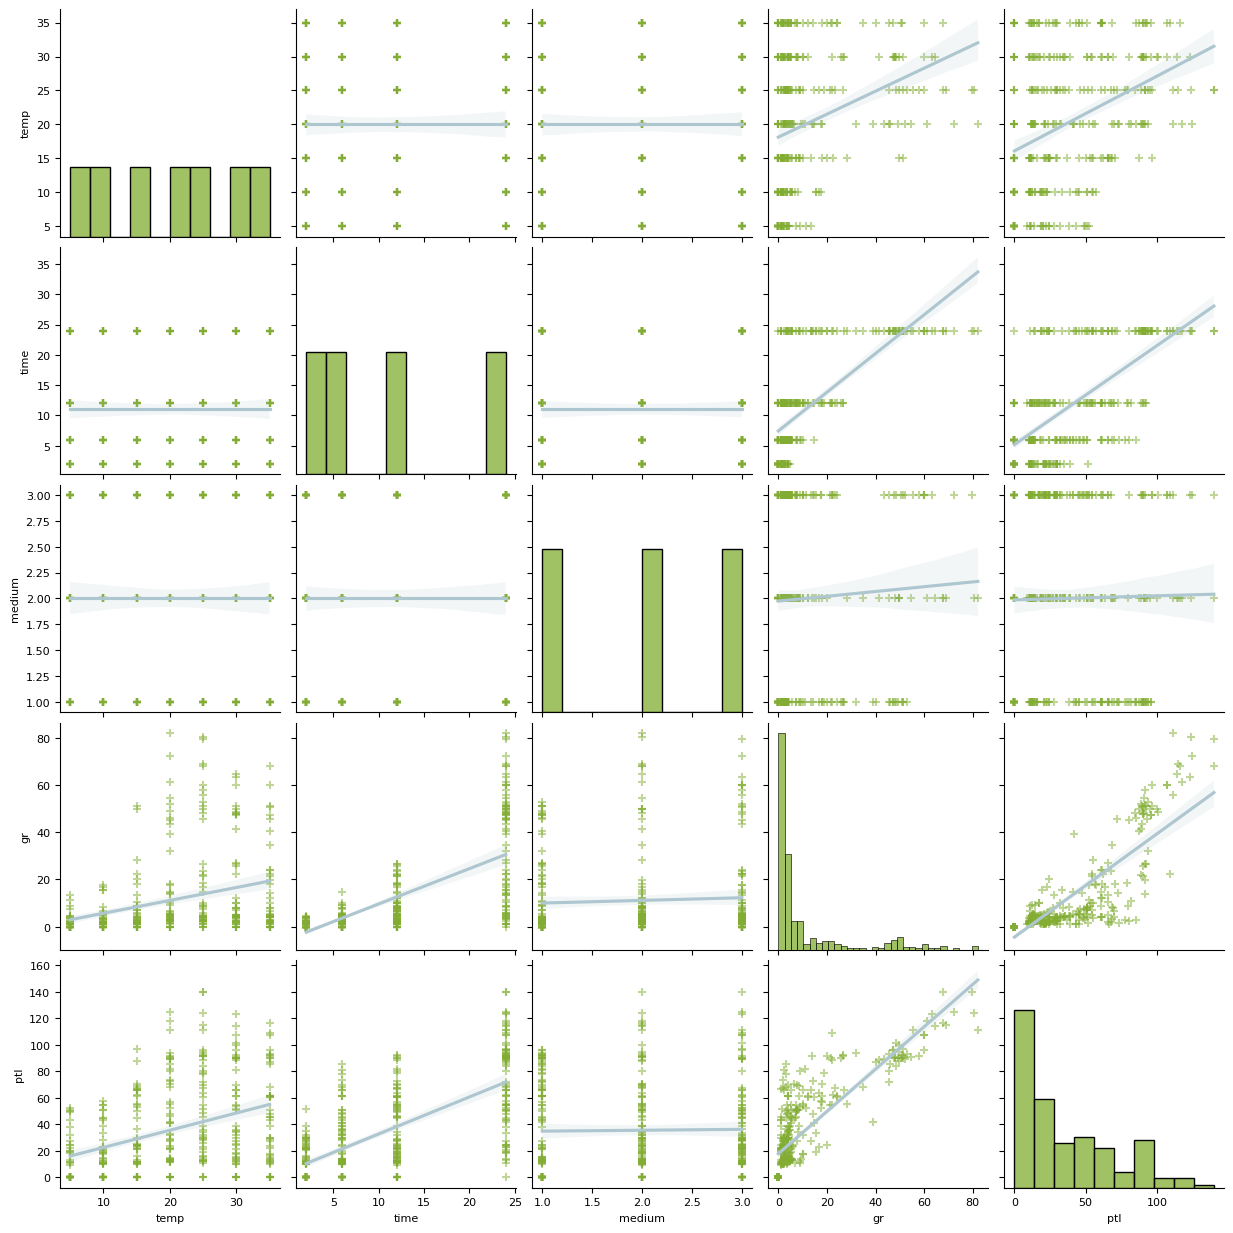

In [9]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


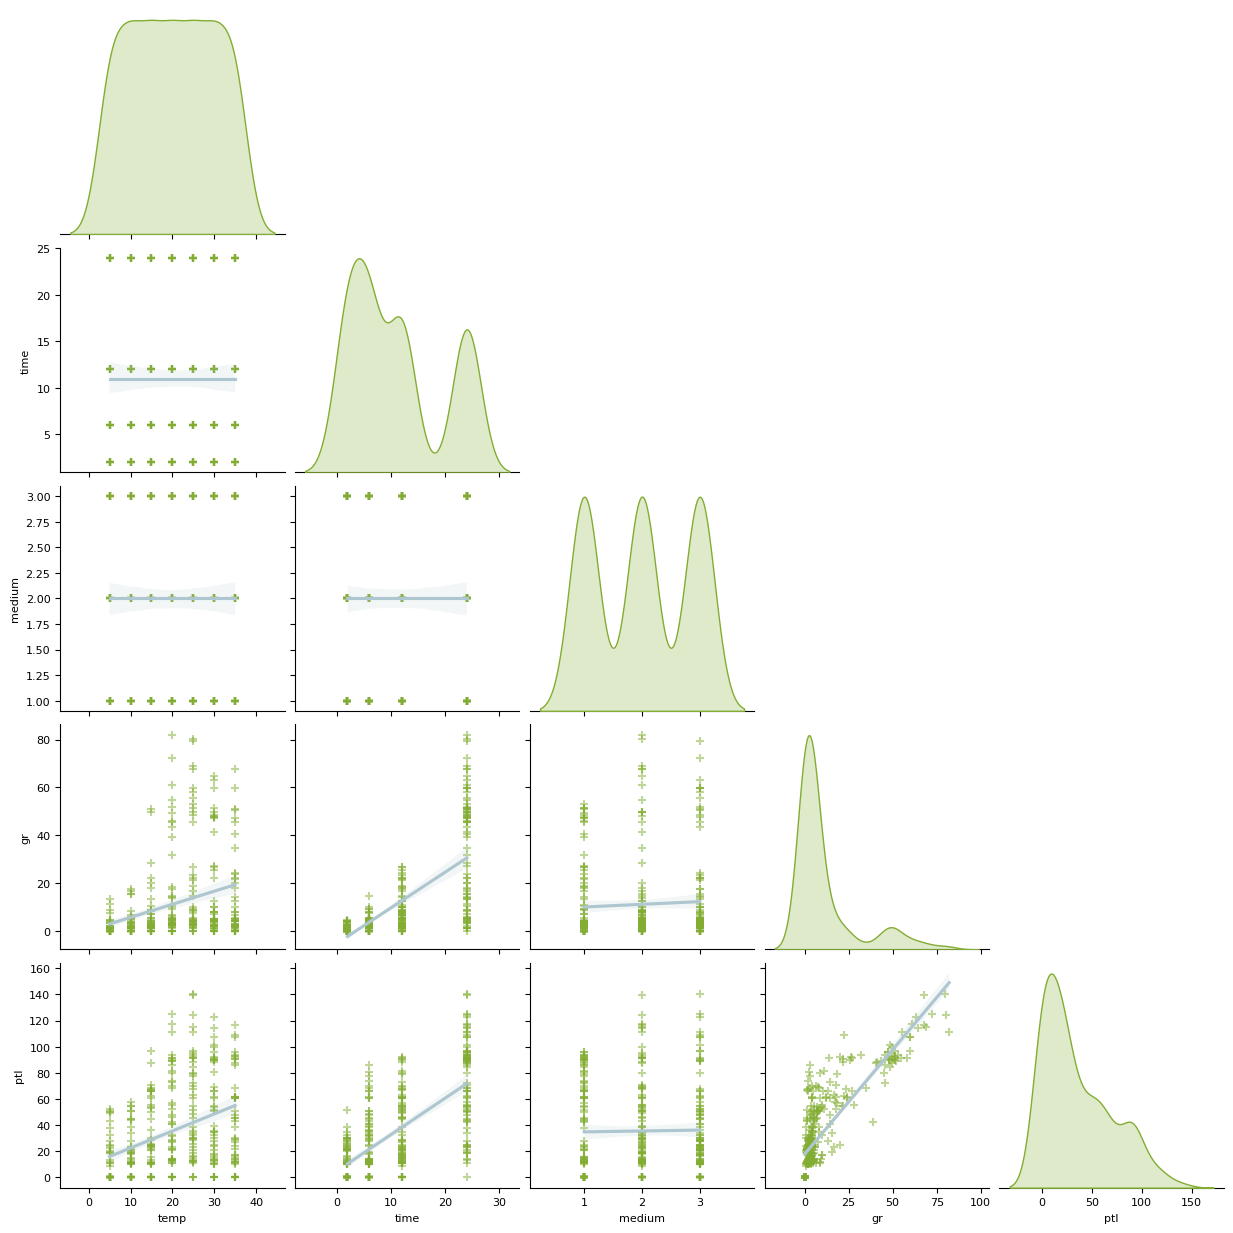

In [10]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

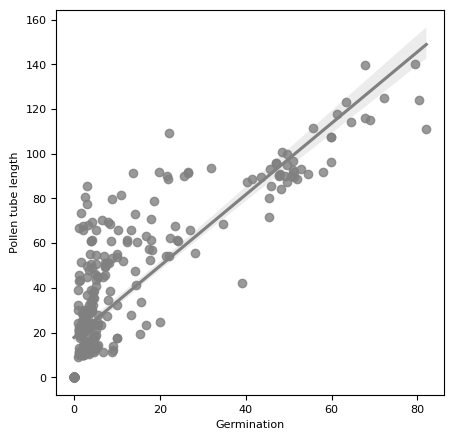

In [11]:
plt.figure(figsize = (5,5))

font = {'family' : 'Cambria',
        'weight' : 'regular',
        'size'   : 8}

plt.rc('font', **font)
sns.regplot(data=df, x="gr", y="ptl",color="grey")
plt.xlabel("Germination")
plt.ylabel("Pollen tube length")


plt.savefig('ptl_gr_corr.png')

In [12]:
X = df.drop("gr", axis=1).values
y = df["gr"].values
print(X)
print(y)

[[  5.     2.     1.     0.  ]
 [ 10.     2.     1.     0.  ]
 [ 15.     2.     1.     0.  ]
 ...
 [ 25.    24.     3.   111.37]
 [ 30.    24.     3.   100.98]
 [ 35.    24.     3.    47.54]]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.   14.21 18.65  7.11  1.21  1.17  1.29 10.25
 31.85 51.24 47.82 40.31  0.    0.    0.    0.    1.58  1.    1.    0.
  0.    1.07  2.84  3.01  2.56  2.3   0.    0.    2.06  6.51  8.91  7.85
  5.24  1.03  5.21  8.34 13.69 49.69 41.36 34.67  0.    0.    1.25  2.35
  2.45  2.01  1.61  0.    1.02  2.99  3.47  4.11  5.03  4.08  0.    0.
  1.06  1.43  2.71  1.84  1.77  0.    1.17  5.57 51.95 57.96 47.68 50.67
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.74  2.98
  2.51  3.01  0.    0.    1.24 10.87 21.98 25.64 21.64  3.14  3.65  7.1
 45.88 48.27 51.2  51.01  0.    0.    0.    2.64  2.58  4.08  4.65  1.07
  1.64  1.91  4.03  3.98  4.5   4.09  1.34  1.25  1.91  4.98 14.65 12.3
 12.3   3.99 

*

# germination rate ** 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(268, 4)
(68, 4)
(268,)
(68,)


In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[ 0.52712101 -1.07297753  1.23290459 -0.15100467]
 [ 0.02438638 -1.07297753  1.23290459 -0.40970654]
 [-1.48381751  0.13626544  1.23290459 -0.70211357]
 ...
 [-0.98108288  1.58735701 -1.24213983  0.59080447]
 [ 0.52712101  0.13626544 -1.24213983  1.66966518]
 [ 0.52712101  0.13626544 -1.24213983  1.58569795]]
[[-0.47834825  0.13626544  1.23290459 -0.40261072]
 [ 1.02985564  1.58735701 -1.24213983  1.62029008]
 [ 0.52712101  0.13626544 -0.00461762  0.83738431]
 [ 0.02438638  1.58735701 -1.24213983  1.49729582]
 [ 0.52712101  1.58735701 -1.24213983  1.72731874]
 [-1.48381751  0.13626544 -0.00461762 -1.03413894]
 [ 1.02985564 -1.07297753  1.23290459 -0.31893914]
 [ 0.02438638 -1.07297753 -0.00461762 -0.23290229]
 [-0.98108288  1.58735701 -0.00461762 -0.61430276]
 [-1.48381751 -1.07297753  1.23290459 -1.03413894]
 [-0.98108288 -1.07297753 -0.00461762 -0.70270489]
 [ 0.52712101  1.58735701 -1.24213983  1.68060458]
 [-0.47834825 -0.58928034 -1.24213983 -1.03413894]
 [-0.98108288  1.58735701

In [15]:
plt.figure(figsize=(12,10))


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
ann = Sequential()                          
ann.add(Dense(units=12, activation="relu"))  
ann.add(Dense(units=12, activation="relu"))  
ann.add(Dense(units=1))   


In [18]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [19]:
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
9/9 [==============================] - 1s 23ms/step - loss: 405.2245 - val_loss: 582.7671
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 401.8869 - val_loss: 578.7595
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 398.7592 - val_loss: 574.7494
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 395.4364 - val_loss: 570.6945
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 392.1015 - val_loss: 566.4915
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 388.5999 - val_loss: 562.1505
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 385.4331 - val_loss: 557.3148
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 381.3170 - val_loss: 552.5212
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 377.2614 - val_loss: 547.3142
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 373.1768 - val_los

In [20]:
pd.DataFrame(ann.history.history)

,loss,val_loss
0,405.224548,582.767090
1,401.886902,578.759521
2,398.759216,574.749390
3,395.436432,570.694458
4,392.101532,566.491516
...,...,...
95,43.541153,55.182415
96,43.284267,55.261566
97,43.178471,54.892021
98,43.054966,55.105202


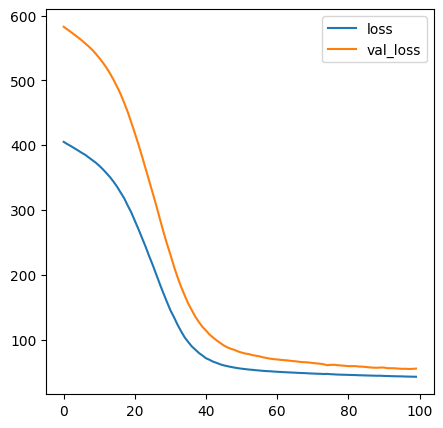

In [21]:
plt.style.use("default")
pd.DataFrame(ann.history.history).plot(figsize=(5,5))
plt.savefig('gr_training.png')

In [22]:
ann.evaluate(X_train,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 42.8368


42.83675003051758

In [23]:
ann.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 55.5122


55.512245178222656

In [24]:
# gr için testlerin tahmin oranı 
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df 
comparison_df.to_csv("ann1.txt")

3/3 [==============================] - 0s 3ms/step


In [25]:
print(y_test.shape)       
print(predictions.shape)  

(68,)
(68, 1)


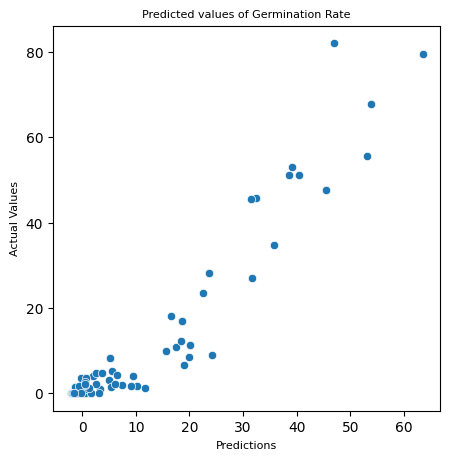

In [26]:
# sadece çimlenme oranı için 
plt.figure(figsize=(5,5))
plt.style.use("default")
sns.scatterplot(x=predictions[:,0],y=y_test)
plt.title("Predicted values of Germination Rate",fontsize=8)
plt.xlabel("Predictions", fontsize=8)
plt.ylabel("Actual Values", fontsize=8)
plt.savefig('gr_learning.png', dpi=300)


In [27]:
from sklearn import metrics
print("DL-MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("DL-MSE:",metrics.mean_squared_error(y_test,predictions))
print("DL-RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("DL-R2:",metrics.explained_variance_score(y_test,predictions)) 

DL-MAE: 4.766369062276447
DL-MSE: 55.512240473509756
DL-RMSE: 7.450653694375397
DL-R2: 0.8710371708538784


/tmp/ipykernel_33/3895413534.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions,bins=50)


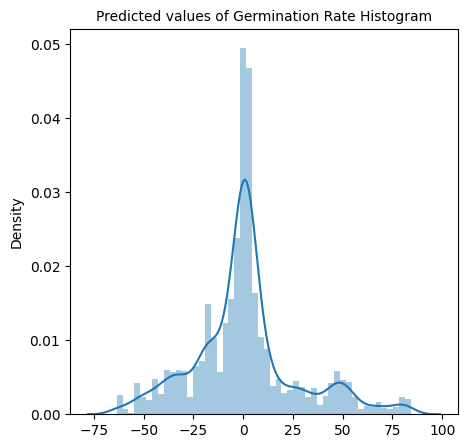

In [28]:

plt.figure(figsize=(5,5))
plt.style.use("default")
plt.title("Predicted values of Germination Rate Histogram", fontsize=10)
sns.distplot(y_test-predictions,bins=50) 
plt.savefig('gr_deep_learn_hist.png')

ML - Random forest regresyon 

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Get the mean absolute error on the validation data
predictions = model.predict(X_test)
print("RF-MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("RF-MSE:",metrics.mean_squared_error(y_test,predictions))
print("RF-RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R2:",metrics.explained_variance_score(y_test,predictions)) 

RF-MAE: 4.2191705882352935
RF-MSE: 63.17433452117642
RF-RMSE: 7.9482283888409
R2: 0.8560941725994119


XGBoost algorithm

In [31]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)


XGBpredictions = XGBModel.predict(X_test)

print("X-MAE:",metrics.mean_absolute_error(y_test,XGBpredictions))
print ("X-MSE:",metrics.mean_squared_error(y_test,XGBpredictions))
print("X-RMSE:",np.sqrt(metrics.mean_squared_error(y_test,XGBpredictions)))
print("X-R2:",metrics.explained_variance_score(y_test,XGBpredictions)) 



X-MAE: 5.050595286507982
X-MSE: 93.80563539007248
X-RMSE: 9.685330938593296
X-R2: 0.7867576480323075


Lineer regresyon

In [32]:
from sklearn.linear_model import LinearRegression
model_l = LinearRegression()
model_l.fit(X_train,y_train)
pred_l = model_l.predict(X_test)
print("X-MAE:",metrics.mean_absolute_error(y_test,pred_l))
print ("X-MSE:",metrics.mean_squared_error(y_test,pred_l))
print("X-RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_l)))
print("X-R2:",metrics.explained_variance_score(y_test,pred_l))

X-MAE: 7.70734280159608
X-MSE: 109.39796868965132
X-RMSE: 10.459348387430802
X-R2: 0.7441356279964055
